In [29]:
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ralbu85/Lecture_DeepLearning_2022/main/auto.csv')
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


In [3]:
y = df.pop('mpg')
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [4]:
X = df
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1
388,4,97.0,52.0,2130.0,24.6,82,2
389,4,135.0,84.0,2295.0,11.6,82,1
390,4,120.0,79.0,2625.0,18.6,82,1


In [5]:
X.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [6]:
X=pd.get_dummies(df, columns=['origin'], prefix='origin')
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [7]:
from sklearn.preprocessing import StandardScaler

In [13]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin_1', 'origin_2', 'origin_3'],
      dtype='object')

In [15]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 1.48394702,  1.07728956,  0.66413273, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [ 1.48394702,  1.48873169,  1.57459447, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [ 1.48394702,  1.1825422 ,  1.18439658, ...,  0.77459667,
        -0.45812285, -0.50239045],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [-0.86401356, -0.7120053 , -0.66254009, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [-0.86401356, -0.72157372, -0.58450051, ...,  0.77459667,
        -0.45812285, -0.50239045]])

In [27]:
scale_X_df = pd.DataFrame(data = scaler.fit_transform(X), columns=X.columns)
scale_X_df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,0.774597,-0.458123,-0.50239
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,0.774597,-0.458123,-0.50239
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,0.774597,-0.458123,-0.50239
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,0.774597,-0.458123,-0.50239
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,0.774597,-0.458123,-0.50239
...,...,...,...,...,...,...,...,...,...
387,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,0.774597,-0.458123,-0.50239
388,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,-1.290994,2.182821,-0.50239
389,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,0.774597,-0.458123,-0.50239
390,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,0.774597,-0.458123,-0.50239


In [20]:
y.shape

(392,)

In [24]:
import numpy as np

In [28]:
scale_X = scale_X_df.values
scale_X

array([[ 1.48394702,  1.07728956,  0.66413273, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [ 1.48394702,  1.48873169,  1.57459447, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [ 1.48394702,  1.1825422 ,  1.18439658, ...,  0.77459667,
        -0.45812285, -0.50239045],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [-0.86401356, -0.7120053 , -0.66254009, ...,  0.77459667,
        -0.45812285, -0.50239045],
       [-0.86401356, -0.72157372, -0.58450051, ...,  0.77459667,
        -0.45812285, -0.50239045]])

In [39]:
y = np.array(y)
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

## 딥러닝 회귀모형 만들기

In [40]:
scale_X.shape[1]

9

In [41]:
model = keras.Sequential([
    layers.Dense(16, input_shape = [ X.shape[1] ], activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1), # 회귀문제의 경우 마지막 출력층에 활성화함수를 따로 두지 않는다
])

optimizer = keras.optimizers.RMSprop(0.001)

# metrics는 얼마나 잘 맞췄는지에 대한 평가 지표
model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mse'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_1 = model.fit(scale_X, y, epochs=500, validation_split=0.2)

Epoch 1/1000


2022-10-14 19:03:10.404057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 54ms/step - loss: 479.0983 - mse: 478.3538 - val_loss: 903.5083 - val_mse: 900.0720
Epoch 2/1000
 1/10 [==>...........................] - ETA: 0s - loss: 475.0516 - mse: 475.0516

2022-10-14 19:03:11.164203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 15ms/step - loss: 447.9728 - mse: 447.7007 - val_loss: 862.0778 - val_mse: 858.7413
Epoch 3/1000
10/10 [==============================] - 0s 13ms/step - loss: 423.8429 - mse: 424.4633 - val_loss: 822.6349 - val_mse: 819.4464
Epoch 4/1000
10/10 [==============================] - 0s 13ms/step - loss: 400.7517 - mse: 399.6120 - val_loss: 783.7572 - val_mse: 780.7054
Epoch 5/1000
10/10 [==============================] - 0s 13ms/step - loss: 377.1786 - mse: 377.0663 - val_loss: 744.0733 - val_mse: 741.1025
Epoch 6/1000
10/10 [==============================] - 0s 12ms/step - loss: 353.3109 - mse: 351.8740 - val_loss: 705.7750 - val_mse: 703.0573
Epoch 7/1000
10/10 [==============================] - 0s 11ms/step - loss: 329.8790 - mse: 331.0427 - val_loss: 666.2208 - val_mse: 663.9530
Epoch 8/1000
10/10 [==============================] - 0s 12ms/step - loss: 306.3528 - mse: 308.0831 - val_loss: 626.6648 - val_mse: 624.6147
Epoch 9/1000
10/10 [======

In [52]:
model_1_hist = model_1.history
model_1_hist.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [53]:
model_1_hist

{'loss': [479.0982971191406,
  447.9727783203125,
  423.8428955078125,
  400.751708984375,
  377.17864990234375,
  353.3109436035156,
  329.87896728515625,
  306.3527526855469,
  283.3804626464844,
  260.6165771484375,
  237.9774627685547,
  215.639892578125,
  194.17799377441406,
  173.57232666015625,
  153.96890258789062,
  135.58612060546875,
  117.90290069580078,
  101.5223617553711,
  85.91712188720703,
  71.91920471191406,
  59.6584587097168,
  49.16157531738281,
  40.575138092041016,
  33.78363800048828,
  28.494901657104492,
  24.628631591796875,
  21.692657470703125,
  19.443584442138672,
  17.550838470458984,
  15.883254051208496,
  14.490917205810547,
  13.32262134552002,
  12.312864303588867,
  11.349446296691895,
  10.619925498962402,
  9.969966888427734,
  9.370285987854004,
  8.887556076049805,
  8.346419334411621,
  7.933478832244873,
  7.545217514038086,
  7.182823657989502,
  6.87739896774292,
  6.600257396697998,
  6.35047721862793,
  6.135663986206055,
  5.980546474

In [54]:
import matplotlib.pyplot as plt

(0.0, 50.0)

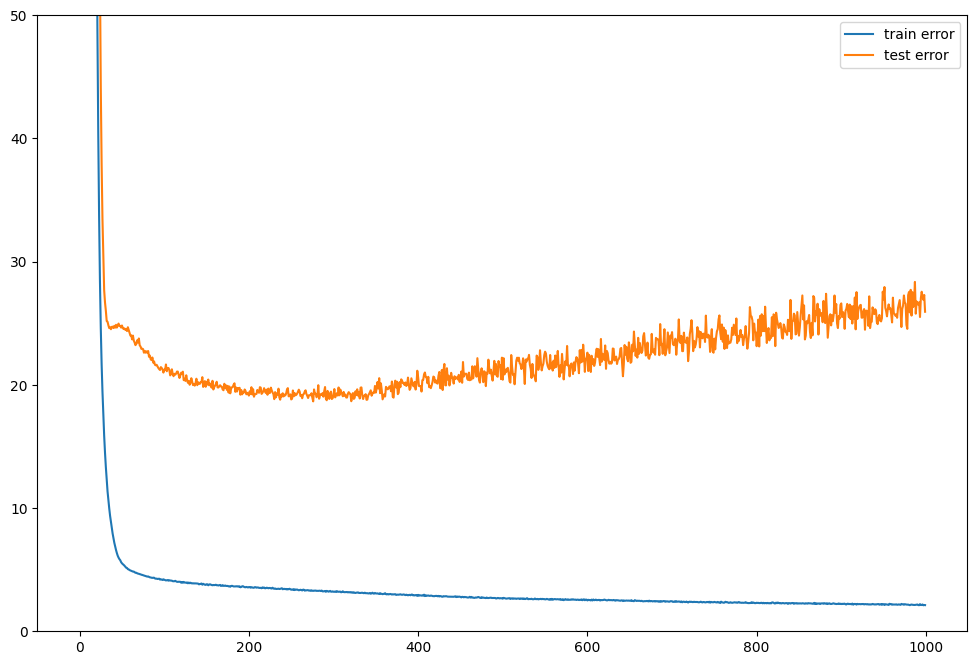

In [57]:
plt.figure(figsize=(12, 8))

plt.plot(model_1_hist['loss'], label= 'train error')
plt.plot(model_1_hist['val_loss'], label= 'test error')

plt.legend()
plt.ylim([0, 50])
